In [ ]:
! pip install newspaper3k
! pip install wordcloud
! pip install emoji
! pip install nltk
! pip install scikit-plot
! pip install umap-learn
! pip install afinn
! pip install -U spacy
! pip install spacytextblob

     |████████████████████████████████| 211 kB 5.2 MB/s 
     |████████████████████████████████| 81 kB 7.6 MB/s 
     |████████████████████████████████| 87 kB 4.5 MB/s 
     |████████████████████████████████| 7.4 MB 46.8 MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13552 sha256=044a274bf1821602f9116a0ba97fa2c0de4e62f148f7bd78f067e760eff5309d
  Stored in directory: /root/.cache/pip/wheels/df/67/41/faca10fa501ca010be41b49d40360c2959e1c4f09bcbfa37fa
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3356 sha256=e6bde47d93a229c817de913b7ac9efddcc9490450da964e18fa1b9130ccd2819
  Stored in directory: /root/.cache/pip/wheels/7f/d4/8f/6e2ca54744c9d7292d88ddb8d42876bcdab5e6d84a21c10346
  Created wheel for jieba3k: filename=jieba3k-0.35.1-py3-none-any.whl size=7398405 sha256=c035f13aa5a9183677971eea2755883f3623774ee72403ec7e38ecd3639f59fb
  Stored in directory: /root/.cache/pip/wheels/4c/91/46/3c208287b726df325a597957432

In [ ]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplot
from umap import UMAP
import seaborn as sns

# some "fun" packages
from wordcloud import WordCloud
import emoji

import re

# text imports

import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer  
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from afinn import Afinn

from newspaper import Article

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from umap import UMAP
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
review = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BU MSBA /BA 820/BA820 Team B9/googleplaystore_user_reviews.csv")

In [ ]:
review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
review_final = review.loc[review.Translated_Review.notnull()]
review_final.reset_index(inplace=True)

In [ ]:
# clean the text
review_final.Translated_Review.astype("string")

0        I like eat delicious food. That's I'm cooking ...
1          This help eating healthy exercise regular basis
2               Works great especially going grocery store
3                                             Best idea us
4                                                 Best way
                               ...                        
37422    Most ads older many agents ..not much owner po...
37423    If photos posted portal load, fit purpose. I'm...
37424    Dumb app, I wanted post property rent give opt...
37425    I property business got link SMS happy perform...
37426    Useless app, I searched flats kondapur, Hydera...
Name: Translated_Review, Length: 37427, dtype: string

In [ ]:
review_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37427 entries, 0 to 37426
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   37427 non-null  int64  
 1   App                     37427 non-null  object 
 2   Translated_Review       37427 non-null  object 
 3   Sentiment               37427 non-null  object 
 4   Sentiment_Polarity      37427 non-null  float64
 5   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.7+ MB


In [ ]:
## # setup the afinn "model"
afinn = Afinn()

In [ ]:
afinn.score("I hate apple so much ")


-3.0

In [ ]:
def sentiment(text):
  return afinn.score(text)

In [ ]:
review_final.Translated_Review

0        I like eat delicious food. That's I'm cooking ...
1          This help eating healthy exercise regular basis
2               Works great especially going grocery store
3                                             Best idea us
4                                                 Best way
                               ...                        
37422    Most ads older many agents ..not much owner po...
37423    If photos posted portal load, fit purpose. I'm...
37424    Dumb app, I wanted post property rent give opt...
37425    I property business got link SMS happy perform...
37426    Useless app, I searched flats kondapur, Hydera...
Name: Translated_Review, Length: 37427, dtype: object

In [ ]:
# clean the text
review_final["sentiment score"] = review_final.Translated_Review.apply(sentiment)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
review_final["sentiment score"].describe()

count    37427.000000
mean         2.528549
std          4.762679
min        -37.000000
25%          0.000000
50%          2.000000
75%          5.000000
max         61.000000
Name: sentiment score, dtype: float64

In [ ]:
review_final.head()

,index,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,sentiment score
0,0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,13.0
1,1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,4.0
2,3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,3.0
3,4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,3.0
4,5,10 Best Foods for You,Best way,Positive,1.00,0.300000,3.0


In [ ]:
reviews_3 = review_final.groupby("App").agg({"sentiment score":["size", "mean"]}).sort_values(("sentiment score","mean"), ascending=False)

#method 2: a way to flatten the multi-inde column 
#https://stackoverflow.com/questions/54828684/pandas-multi-index-issue-in-merging-dataframes



In [ ]:
reviews_3.columns = reviews_3.columns.map("_".join)

In [ ]:
reviews_3.reset_index()

,App,sentiment score_size,sentiment score_mean
0,Calendar+ Schedule Planner App,1,18.000000
1,Fallout Shelter,32,14.031250
2,"CallApp: Caller ID, Blocker & Phone Call Recorder",1,14.000000
3,Dashlane Free Password Manager,2,13.000000
4,Best Fiends - Free Puzzle Game,1,13.000000
...,...,...,...
860,HD Camera,1,-2.000000
861,"HelloTalk — Chat, Speak & Learn Foreign Languages",3,-2.000000
862,HTC Social Plugin - Facebook,39,-2.179487
863,Draw Your Game,2,-3.500000


In [ ]:
review_final.head()

,index,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,sentiment score,sentiment_subjectivity
0,0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,13.0,0.533333
1,1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,4.0,0.288462
2,3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,3.0,0.875000
3,4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,3.0,0.300000
4,5,10 Best Foods for You,Best way,Positive,1.00,0.300000,3.0,0.300000


In [ ]:
review_final["sentiment score"].mean()

2.528548908541962

## Graph: what are the values for score

<Figure size 1080x720 with 0 Axes>

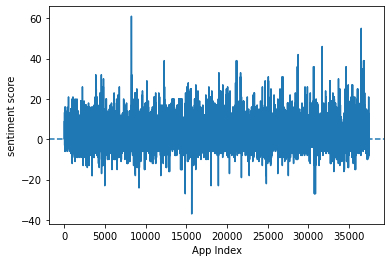

<Figure size 1080x720 with 0 Axes>

In [ ]:
sns.lineplot(x=review_final.index, y="sentiment score", data=review_final)
plt.axhline(y=0, linestyle="--")
plt.xlabel("App Index")
plt.figure(figsize=(15,10))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


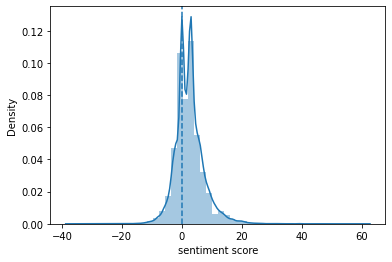

In [ ]:
sns.distplot(review_final["sentiment score"])
plt.axvline(x=0, linestyle="--")
plt.show()

## Sentiment_Polarity

In [ ]:
import spacy
from spacy import cli
from spacytextblob.spacytextblob import SpacyTextBlob

In [ ]:
cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
def sentiment_polarity(text):
  return nlp(text)._.polarity

In [ ]:
review_final["sentiment_polarity"] = review_final.Translated_Review.apply(sentiment_polarity)

In [ ]:
review_final

## Sentiment_Subjectivity

In [ ]:
def sentiment_subjetivity(text):
  return nlp(text)._.subjectivity 

In [ ]:
review_final["sentiment_subjectivity"] = review_final.Translated_Review.apply(sentiment_subjetivity)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
review_final.drop(columns=["Sentiment", "Sentiment_Polarity","Sentiment_Subjectivity"], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
review_final.head()

,index,App,Translated_Review,sentiment score,sentiment_subjectivity
0,0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,13.0,0.533333
1,1,10 Best Foods for You,This help eating healthy exercise regular basis,4.0,0.288462
2,3,10 Best Foods for You,Works great especially going grocery store,3.0,0.875000
3,4,10 Best Foods for You,Best idea us,3.0,0.300000
4,5,10 Best Foods for You,Best way,3.0,0.300000


In [ ]:
read_to_merge = review_final.groupby("App").agg({"sentiment score":"mean", "sentiment_subjectivity":"mean"}).reset_index()

In [ ]:
read_to_merge.head()

,App,sentiment score,sentiment_subjectivity
0,10 Best Foods for You,3.762887,0.495455
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,2.400000,0.545516
2,11st,0.615385,0.455340
3,1800 Contacts - Lens Store,2.900000,0.591098
4,1LINE – One Line with One Touch,1.894737,0.557315


In [ ]:
goog = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BU MSBA /BA 820/BA820 Team B9/goog_final.csv")

In [ ]:
goog.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Type,Content Rating,Genres,Size_key,Installs_num,Price_num,Size_updated
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,Free,Everyone,Art & Design,M,10000,0.0,19456.0
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,Free,Everyone,Art & Design;Pretend Play,M,500000,0.0,14336.0
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,Free,Everyone,Art & Design,M,5000000,0.0,8908.8
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,Free,Teen,Art & Design,M,50000000,0.0,25600.0
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,Free,Everyone,Art & Design;Creativity,M,100000,0.0,2867.2


In [ ]:
merged_lun = pd.merge(goog, read_to_merge, on="App", how="outer")

In [ ]:
merged_lun[["App"]== "Coloring book moana"]]

SyntaxError: ignored

In [ ]:
merged_lun [ merged_lun["App"] == "Coloring book moana"]

,Unnamed: 0,App,Category,Rating,Reviews,Size,Type,Content Rating,Genres,Size_key,Installs_num,Price_num,Size_updated,sentiment score,sentiment_subjectivity
1,1.0,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,Free,Everyone,Art & Design;Pretend Play,M,500000.0,0.0,14336.0,1.090909,0.64154
2,2033.0,Coloring book moana,FAMILY,3.9,974.0,14M,Free,Everyone,Art & Design;Pretend Play,M,500000.0,0.0,14336.0,1.090909,0.64154


In [ ]:
merge.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Type,Content Rating,Genres,Size_key,Installs_num,Price_num,Size_updated,Avg_sentiment_score,Avg_sentiment_polarity,Avg_sentiment_subjectivity
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,Free,Everyone,Art & Design,M,10000,0.0,19456.0,NaN,NaN,NaN
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,Free,Everyone,Art & Design;Pretend Play,M,500000,0.0,14336.0,1.090909,0.152652,0.64154
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,Free,Everyone,Art & Design,M,5000000,0.0,8908.8,NaN,NaN,NaN
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,Free,Teen,Art & Design,M,50000000,0.0,25600.0,NaN,NaN,NaN
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,Free,Everyone,Art & Design;Creativity,M,100000,0.0,2867.2,NaN,NaN,NaN


In [ ]:
merge [ merge["App"] == "Coloring book moana"]

,Unnamed: 0,App,Category,Rating,Reviews,Size,Type,Content Rating,Genres,Size_key,Installs_num,Price_num,Size_updated,Avg_sentiment_score,Avg_sentiment_polarity,Avg_sentiment_subjectivity
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,Free,Everyone,Art & Design;Pretend Play,M,500000,0.0,14336.0,1.090909,0.152652,0.64154
1293,1293,Coloring book moana,FAMILY,3.9,974,14M,Free,Everyone,Art & Design;Pretend Play,M,500000,0.0,14336.0,1.090909,0.152652,0.64154


In [ ]:
review_final.to_csv('final_reviews.csv', index=False)

In [ ]:
! head final_reviews.csv

## Summary 

In [ ]:
merge = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BU MSBA /BA 820/BA820 Team B9/merged_table (1).csv")

In [ ]:
merge.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Type,Content Rating,Genres,Size_key,Installs_num,Price_num,Size_updated,Avg_sentiment_score,Avg_sentiment_polarity,Avg_sentiment_subjectivity
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,Free,Everyone,Art & Design,M,10000,0.0,19456.0,NaN,NaN,NaN
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,Free,Everyone,Art & Design;Pretend Play,M,500000,0.0,14336.0,1.090909,0.152652,0.64154
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,Free,Everyone,Art & Design,M,5000000,0.0,8908.8,NaN,NaN,NaN
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,Free,Teen,Art & Design,M,50000000,0.0,25600.0,NaN,NaN,NaN
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,Free,Everyone,Art & Design;Creativity,M,100000,0.0,2867.2,NaN,NaN,NaN


In [ ]:
cate_group = merge.groupby("Category").agg({"Installs_num":"mean", "Rating":"mean", "Reviews":"sum", "Avg_sentiment_score":"mean", "Avg_sentiment_polarity":"mean", "Avg_sentiment_subjectivity":"mean"}).sort_values(by="Avg_sentiment_score", ascending=False)  

In [ ]:
cate_group

,Installs_num,Rating,Reviews,Avg_sentiment_score,Avg_sentiment_polarity,Avg_sentiment_subjectivity
Category,,,,,,
PARENTING,5.355911e+05,4.347727,879978,4.290133,0.276278,0.474780
HEALTH_AND_FITNESS,4.037468e+06,4.206533,8568594,3.906018,0.312579,0.513991
FAMILY,4.211832e+06,4.189308,288465414,3.555234,0.146053,0.514803
ART_AND_DESIGN,1.710829e+06,4.381034,1087220,3.417839,0.249585,0.558058
PRODUCTIVITY,1.173724e+07,4.141558,42642801,3.344135,0.197793,0.459314
AUTO_AND_VEHICLES,6.947587e+05,4.147619,992286,3.209921,0.217920,0.515645
GAME,2.794833e+07,4.265693,1206722017,3.174941,0.051168,0.501759
COMMUNICATION,1.619862e+07,4.097573,89076767,2.839698,0.212388,0.513151
MEDICAL,1.280151e+05,4.178339,1234176,2.736228,0.225273,0.484181


In [ ]:
genres_group = merge.groupby("Genres").agg({"Avg_sentiment_score":"mean", "Avg_sentiment_polarity":"mean", "Avg_sentiment_subjectivity":"mean"}).sort_values(by="Avg_sentiment_score", ascending=False)   

In [ ]:
genres_group.head(10)

,Avg_sentiment_score,Avg_sentiment_polarity,Avg_sentiment_subjectivity
Genres,,,
Simulation;Pretend Play,9.071429,0.168933,0.579257
Simulation,8.532397,0.127335,0.532435
Role Playing,5.352751,0.082781,0.514080
Role Playing;Action & Adventure,5.243243,0.043808,0.550960
Action;Action & Adventure,5.176471,0.334009,0.573327
Parenting;Music & Video,5.135221,0.283308,0.501361
Simulation;Action & Adventure,4.814760,0.102430,0.496571
Art & Design;Creativity,4.552632,0.171836,0.572762
Strategy,4.363502,0.050286,0.499331


In [ ]:
genres_group

,Avg_sentiment_score,Avg_sentiment_polarity,Avg_sentiment_subjectivity
Genres,,,
Simulation;Pretend Play,9.071429,0.168933,0.579257
Simulation,8.532397,0.127335,0.532435
Role Playing,5.352751,0.082781,0.514080
Role Playing;Action & Adventure,5.243243,0.043808,0.550960
Action;Action & Adventure,5.176471,0.334009,0.573327
Parenting;Music & Video,5.135221,0.283308,0.501361
Simulation;Action & Adventure,4.814760,0.102430,0.496571
Art & Design;Creativity,4.552632,0.171836,0.572762
Strategy,4.363502,0.050286,0.499331


In [ ]:
pd.set_option("display.max_rows",200)